# Name: Piyusha Vinzey



# The Sparks Foundation: ComputerVision and IOT

# Task-2: Color Identification in Images

# Import Libraries

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (177, 284, 3)


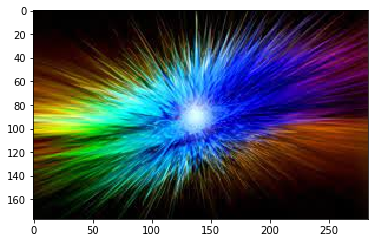

In [5]:
image = cv2.imread('images\color.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


# From BGR color space to RGB

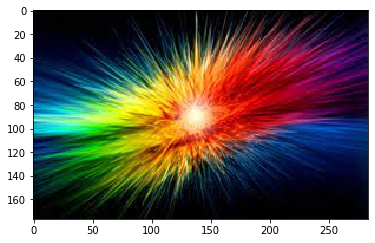

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

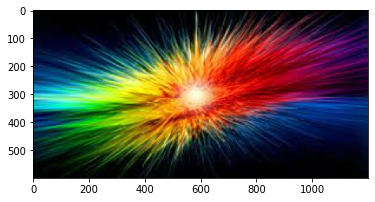

In [7]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# RGB to Hex Conversion

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Read image in RGB color space

In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# Obtaining PIE CHART

[array([ 16.14529002,  67.84742459, 118.11011601]),
 array([ 34.43266386, 109.79176397,  23.39031605]),
 array([228.23610247, 163.99411865,  33.46123395]),
 array([ 4.20834323,  6.02723027, 11.48083063]),
 array([106.69872941,  17.78715294,  56.35952941]),
 array([221.59237634, 215.67577393, 120.25151482]),
 array([195.5528328 ,  31.95407646,  23.06328881]),
 array([128.27136313, 132.00371189,  44.56096983]),
 array([15.32338407, 25.82846217, 56.65612972]),
 array([ 54.24828743, 199.73381798, 172.22116594])]

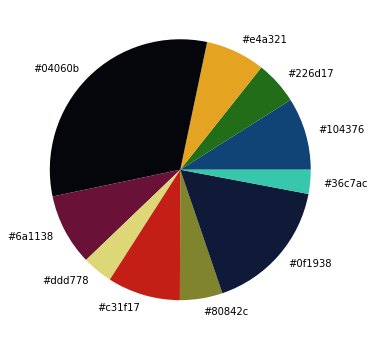

In [13]:
get_colors(get_image('images\color.jpg'), 10, True)

# Search Images using color

In [16]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

# Get all Images

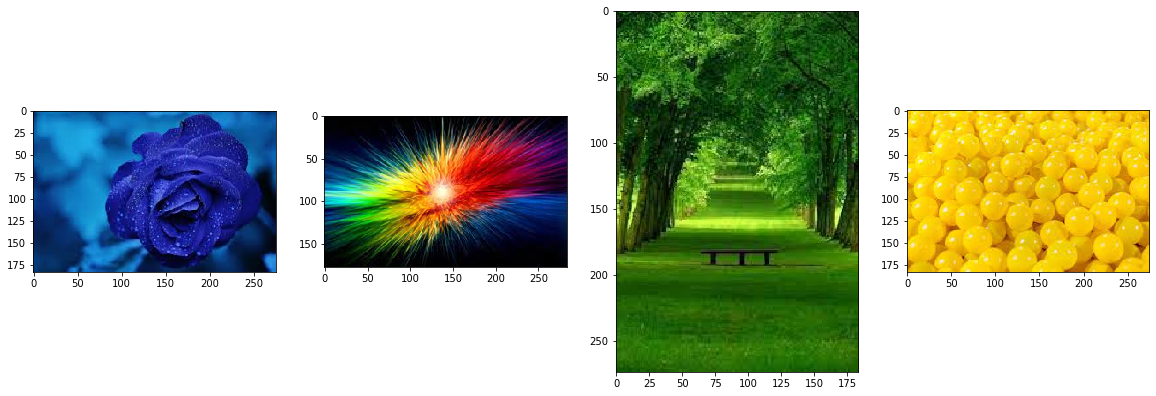

In [17]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [18]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [19]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

# Filtering images based on color

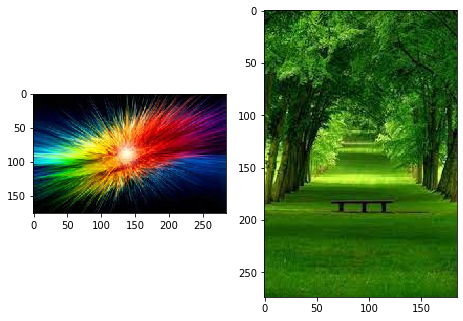

In [20]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

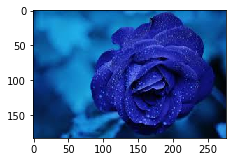

In [21]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

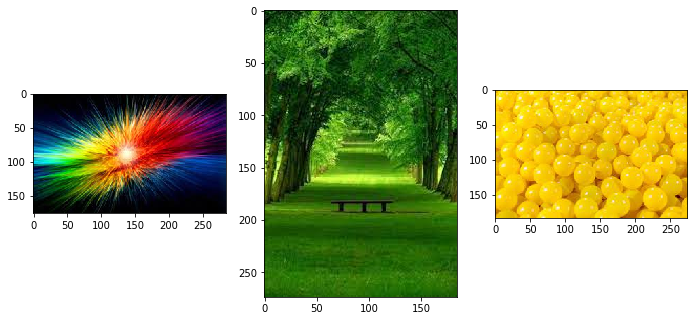

In [22]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)